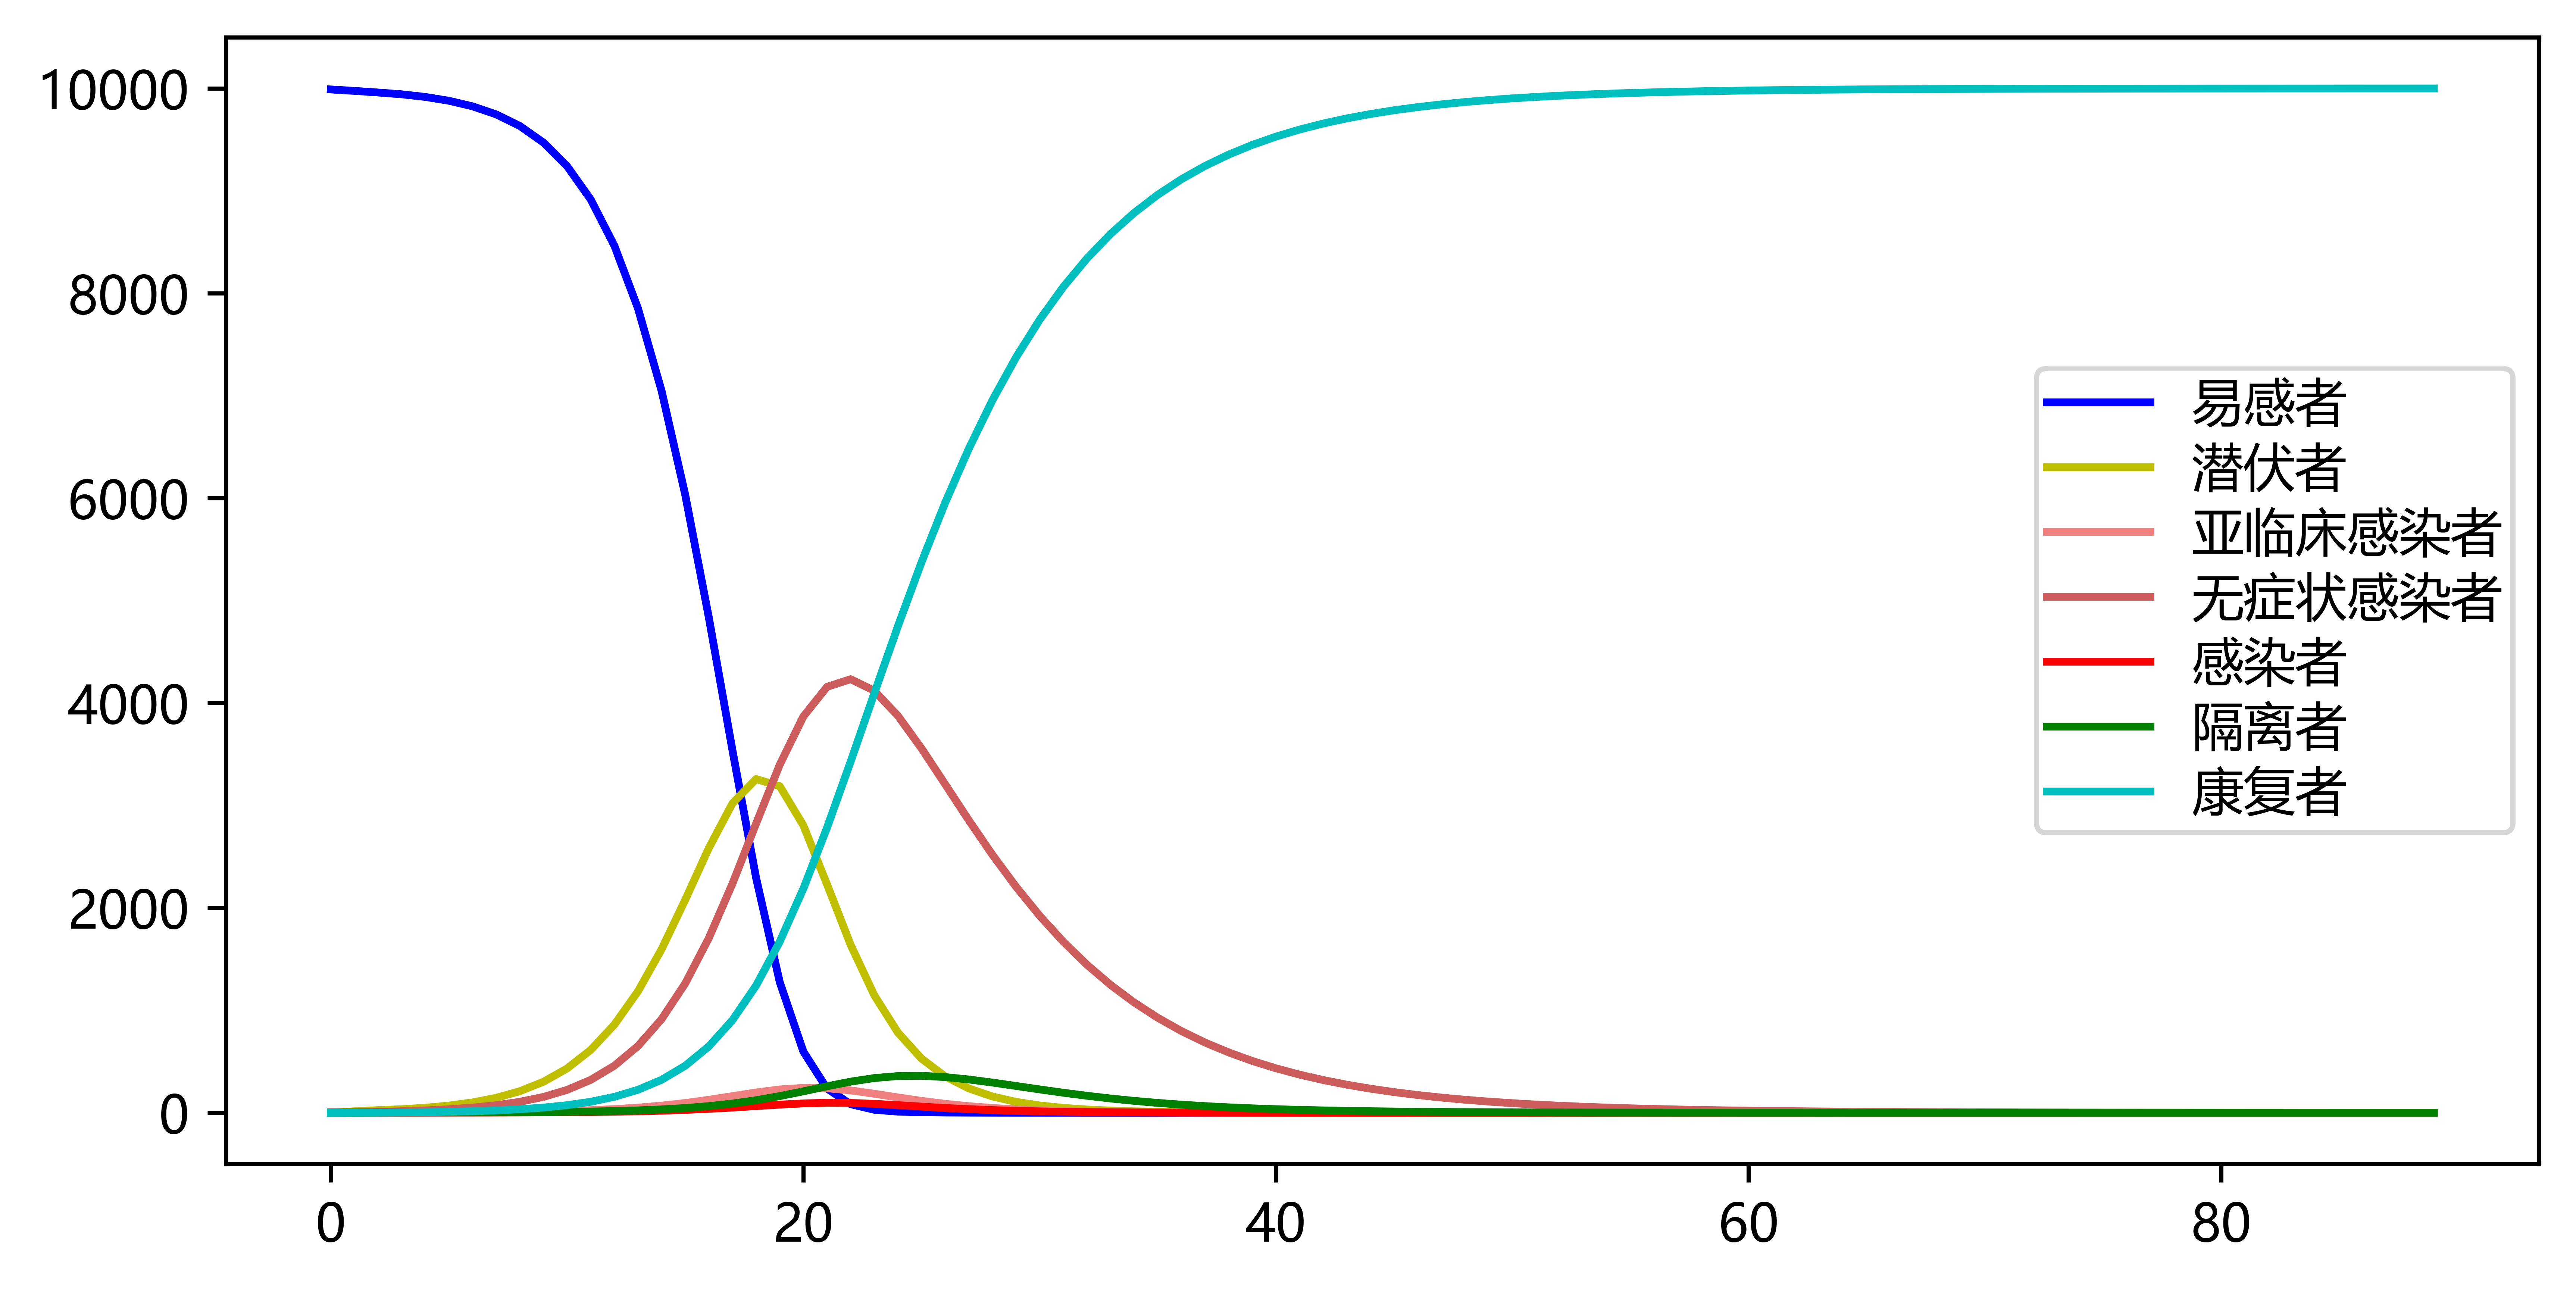

[1.00000000e+01 2.33457143e+01 3.65788513e+01 5.18581854e+01
 7.45760961e+01 1.07923721e+02 1.56367432e+02 2.26439277e+02
 3.27350712e+02 4.71845483e+02 6.77102442e+02 9.65351518e+02
 1.36348313e+03 1.90027013e+03 2.59900647e+03 3.46307566e+03
 4.45409943e+03 5.47000324e+03 6.34401978e+03 6.89227559e+03
 7.00691576e+03 6.72367620e+03 6.18519583e+03 5.53948579e+03
 4.88210835e+03 4.26064824e+03 3.69513345e+03 3.19164896e+03
 2.74936597e+03 2.36416070e+03 2.03053581e+03 1.74264430e+03
 1.49481839e+03 1.28182224e+03 1.09895183e+03 9.42052438e+02
 8.07493874e+02 6.92126308e+02 5.93229021e+02 5.08458848e+02
 4.35801619e+02 3.73528082e+02 3.20154743e+02 2.74409541e+02
 2.35202028e+02 2.01597587e+02 1.72795232e+02 1.48108522e+02
 1.26949190e+02 1.08813090e+02 9.32681696e+01 7.99441445e+01
 6.85236664e+01 5.87347480e+01 5.03442757e+01 4.31524499e+01
 3.69880225e+01 3.17042148e+01 2.71752204e+01 2.32932074e+01
 1.99657498e+01 1.71136262e+01 1.46689331e+01 1.25734676e+01
 1.07773415e+01 9.237793

In [17]:
T=90     # 天数
N=10000        # 总人数
####各类人群
E=[0]*T         # 潜伏者人数
Ia=[5]*T        # 无症状感染者
Is=[5]*T        # 亚临床感染者
I=[0]*T         # 临床感染者
S=[N-I[0]-Ia[0]-Is[0]]*T    # 易感人数
H=[0]*T         # 隔离人数
R=[0]*T         # 康复人数

#####参数
beta=9.5/3.375# 未隔离感染者在单位时间内平均接触并传染的数量
eta_s=0.5        # 亚临床感染者的传染率
eta_A=0.5        # 无症状感染者的传染率
r=1/3            # 潜伏着转化为感染者概率(潜伏爆发率)
p=0.1           # 亚临床感染者的比例   （1-p)无症状感染者的概率
r1=1/2.5          # 亚临床感染转化为临床感染的比例
r2=1  #1/2       # 临床感染者进行隔离的比例
r3=1/5           # 隔离治疗恢复率
r4=1/7           # 无症状感染的自愈率

#无检测
for i in range(T-1):
    S[i+1]=S[i]-beta*S[i]*(eta_s*Is[i]+eta_A*Ia[i]+I[i])/N
    E[i+1]=E[i]+beta*S[i]*(eta_s*Is[i]+eta_A*Ia[i]+I[i])/N-r*E[i]
    Is[i+1]=Is[i]+p*r*E[i]-r1*Is[i]
    Ia[i+1]=Ia[i]+(1-p)*r*E[i]-r4*Ia[i]
    I[i+1]=I[i]+r1*Is[i]-r2*I[i]
    H[i+1]=H[i]+r2*I[i]-r3*H[i]
    R[i+1]=R[i]+r3*H[i]+r4*Ia[i]

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
mpl.rcParams['font.serif'] = ['Microsoft YaHei']
plt.figure(figsize=(8, 4),dpi=1000)
plt.plot(S,color='b',label='易感者')
plt.plot(E,color='y',label='潜伏者')
plt.plot(Is,color='lightcoral',label='亚临床感染者')
plt.plot(Ia,color='indianred',label='无症状感染者')
plt.plot(I,color='r',label='感染者')
plt.plot(H,color='g',label='隔离者')
plt.plot(R,color='c',label='康复者')
plt.legend(loc='best', borderpad=0.2, labelspacing=0.2)
#plt.savefig('./无干预个仓室人群变化.jpg',dpi=1000,bbox_inches = 'tight')
plt.show()
import numpy as np
I=np.array(I)
Is=np.array(Is)
Ia=np.array(Ia)
I_total=I+Is+Ia+E
print(I_total)

import pandas as pd
D={'S':S,'E':E,'Is':Is,'Ia':Ia,'I':I,'H':H,'R':R}
D=pd.DataFrame(D)


In [18]:
T=90    # 天数
N=10000         # 总人数
####各类人群
E=[0]*T         # 潜伏者人数
Ia=[5]*T        # 无症状感染者
Is=[5]*T        # 亚临床感染者
I=[0]*T         # 临床感染者
S=[N-I[0]-Ia[0]-Is[0]]*T    # 易感人数
H=[0]*T         # 隔离人数
R=[0]*T         # 康复人数

#####参数
beta=9.5/3.375# 未隔离感染者在单位时间内平均接触并传染的数量
eta_s=0.5        # 亚临床感染者的传染率
eta_A=0.5        # 无症状感染者的传染率
r=1/3            # 潜伏着转化为感染者概率(潜伏爆发率)
p=0.1          # 亚临床感染者的比例   （1-p)无症状感染者的概率
r1=1/2.5           # 亚临床感染转化为临床感染的比例
r2=1  #1/2       # 临床感染者进行隔离的比例
r3=1/5           # 隔离治疗恢复率
r4=1/7           # 无症状感染的自愈率
delta_rats=0.333     # 亚临床感染个体核酸检测准确率
delta_rata=0.333      # 对无症状个体核酸检测准确率

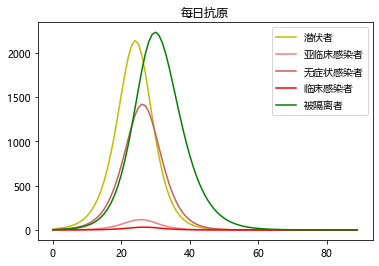

[1.00000000e+01 2.02535714e+01 2.75978229e+01 3.56208041e+01
 4.65566959e+01 6.08895214e+01 7.96030361e+01 1.04001825e+02
 1.35749761e+02 1.76962331e+02 2.30298630e+02 2.99052179e+02
 3.87221436e+02 4.99525294e+02 6.41306508e+02 8.18235952e+02
 1.03569743e+03 1.29771077e+03 1.60527198e+03 1.95410820e+03
 2.33212926e+03 2.71733761e+03 3.07751264e+03 3.37321466e+03
 3.56492450e+03 3.62309689e+03 3.53737818e+03 3.32035396e+03
 3.00357925e+03 2.62799000e+03 2.23352856e+03 1.85200482e+03
 1.50439843e+03 1.20155885e+03 9.46576711e+02 7.37468370e+02
 5.69453181e+02 4.36594541e+02 3.32841616e+02 2.52608662e+02
 1.91039113e+02 1.44075370e+02 1.08421019e+02 8.14520405e+01
 6.11110443e+01 4.58032120e+01 3.43029712e+01 2.56747279e+01
 1.92078761e+01 1.43647953e+01 1.07399564e+01 8.02816900e+00
 6.00015965e+00 4.48391906e+00 3.35053253e+00 2.50345913e+00
 1.87044509e+00 1.39743836e+00 1.04401737e+00 7.79961704e-01
 5.82682099e-01 4.35296015e-01 3.25187365e-01 2.42929132e-01
 1.81477695e-01 1.355705

In [19]:
for i in range(T-1):
    S[i+1]=S[i]-beta*S[i]*(eta_s*Is[i]+eta_A*Ia[i]+I[i])/N
    E[i+1]=E[i]+beta*S[i]*(eta_s*Is[i]+eta_A*Ia[i]+I[i])/N-r*E[i]
    Is[i+1]=Is[i]+p*r*E[i]-delta_rats*Is[i]-(1-delta_rats)*Is[i]*r1
    Ia[i+1]=Ia[i]+(1-p)*r*E[i]-delta_rata*Ia[i]-(1-delta_rata)*Ia[i]*r4
    I[i+1]=I[i]+(1-delta_rats)*Is[i]*r1-r2*I[i]
    H[i+1]=H[i]+delta_rats*Is[i]+delta_rata*Ia[i]+r2*I[i]-r3*H[i]
    R[i+1]=R[i]+r3*H[i]+(1-delta_rata)*Ia[i]*r4
    
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']  # 微软雅黑
mpl.rcParams['font.serif'] = ['Microsoft YaHei']
#plt.plot(S,color='b',label='易感者')
plt.plot(E,color='y',label='潜伏者')
plt.plot(Is,color='lightcoral',label='亚临床感染者')
plt.plot(Ia,color='indianred',label='无症状感染者')
plt.plot(I,color='r',label='临床感染者')
plt.plot(H,color='g',label='被隔离者')
#plt.plot(R,color='c',label='康复者')
plt.legend()
plt.title('每日抗原',size=12,loc='center')
#plt.savefig('./每日抗原人群变化.jpg')
plt.show()

import numpy as np
Is=np.array(Is)
Ia=np.array(Ia)
I_total1=Is+Ia+I+E
print(I_total1)

I_RAT=(sum(I_total)-sum(I_total1))/sum(I_total)
print(I_RAT)

import pandas as pd
import csv
D_RAT={'S':S,'E':E,'Is':Is,'Ia':Ia,'I':I,'H':H,'R':R,'I_total':I_total1}
D_RAT=pd.DataFrame(D_RAT)

In [20]:
#清零后累计感染人数
int(sum(D_RAT[I_total>=1]['I_total']))

51478

In [21]:
from RT_PCRresult import *
I_all

[0.7914463654108137, 0.6288914616281723, 0.5355111880368888]

In [22]:
### 加结果延迟对比
from RT_PCRdelay import *
I_pro_delay

[0.512410536152572, 0.4591190501272644, 0.42439115771277247]

In [23]:
from pandas.core.frame import DataFrame
data_dic={"I_RAT" : I_RAT,
          "I_all" : I_all,
          "I_pro_delay" : I_pro_delay}#将列表a，b转换成字典
data=DataFrame(data_dic)#将字典转换成为数据框
print(data)

      I_RAT     I_all  I_pro_delay
0  0.466295  0.791446     0.512411
1  0.466295  0.628891     0.459119
2  0.466295  0.535511     0.424391


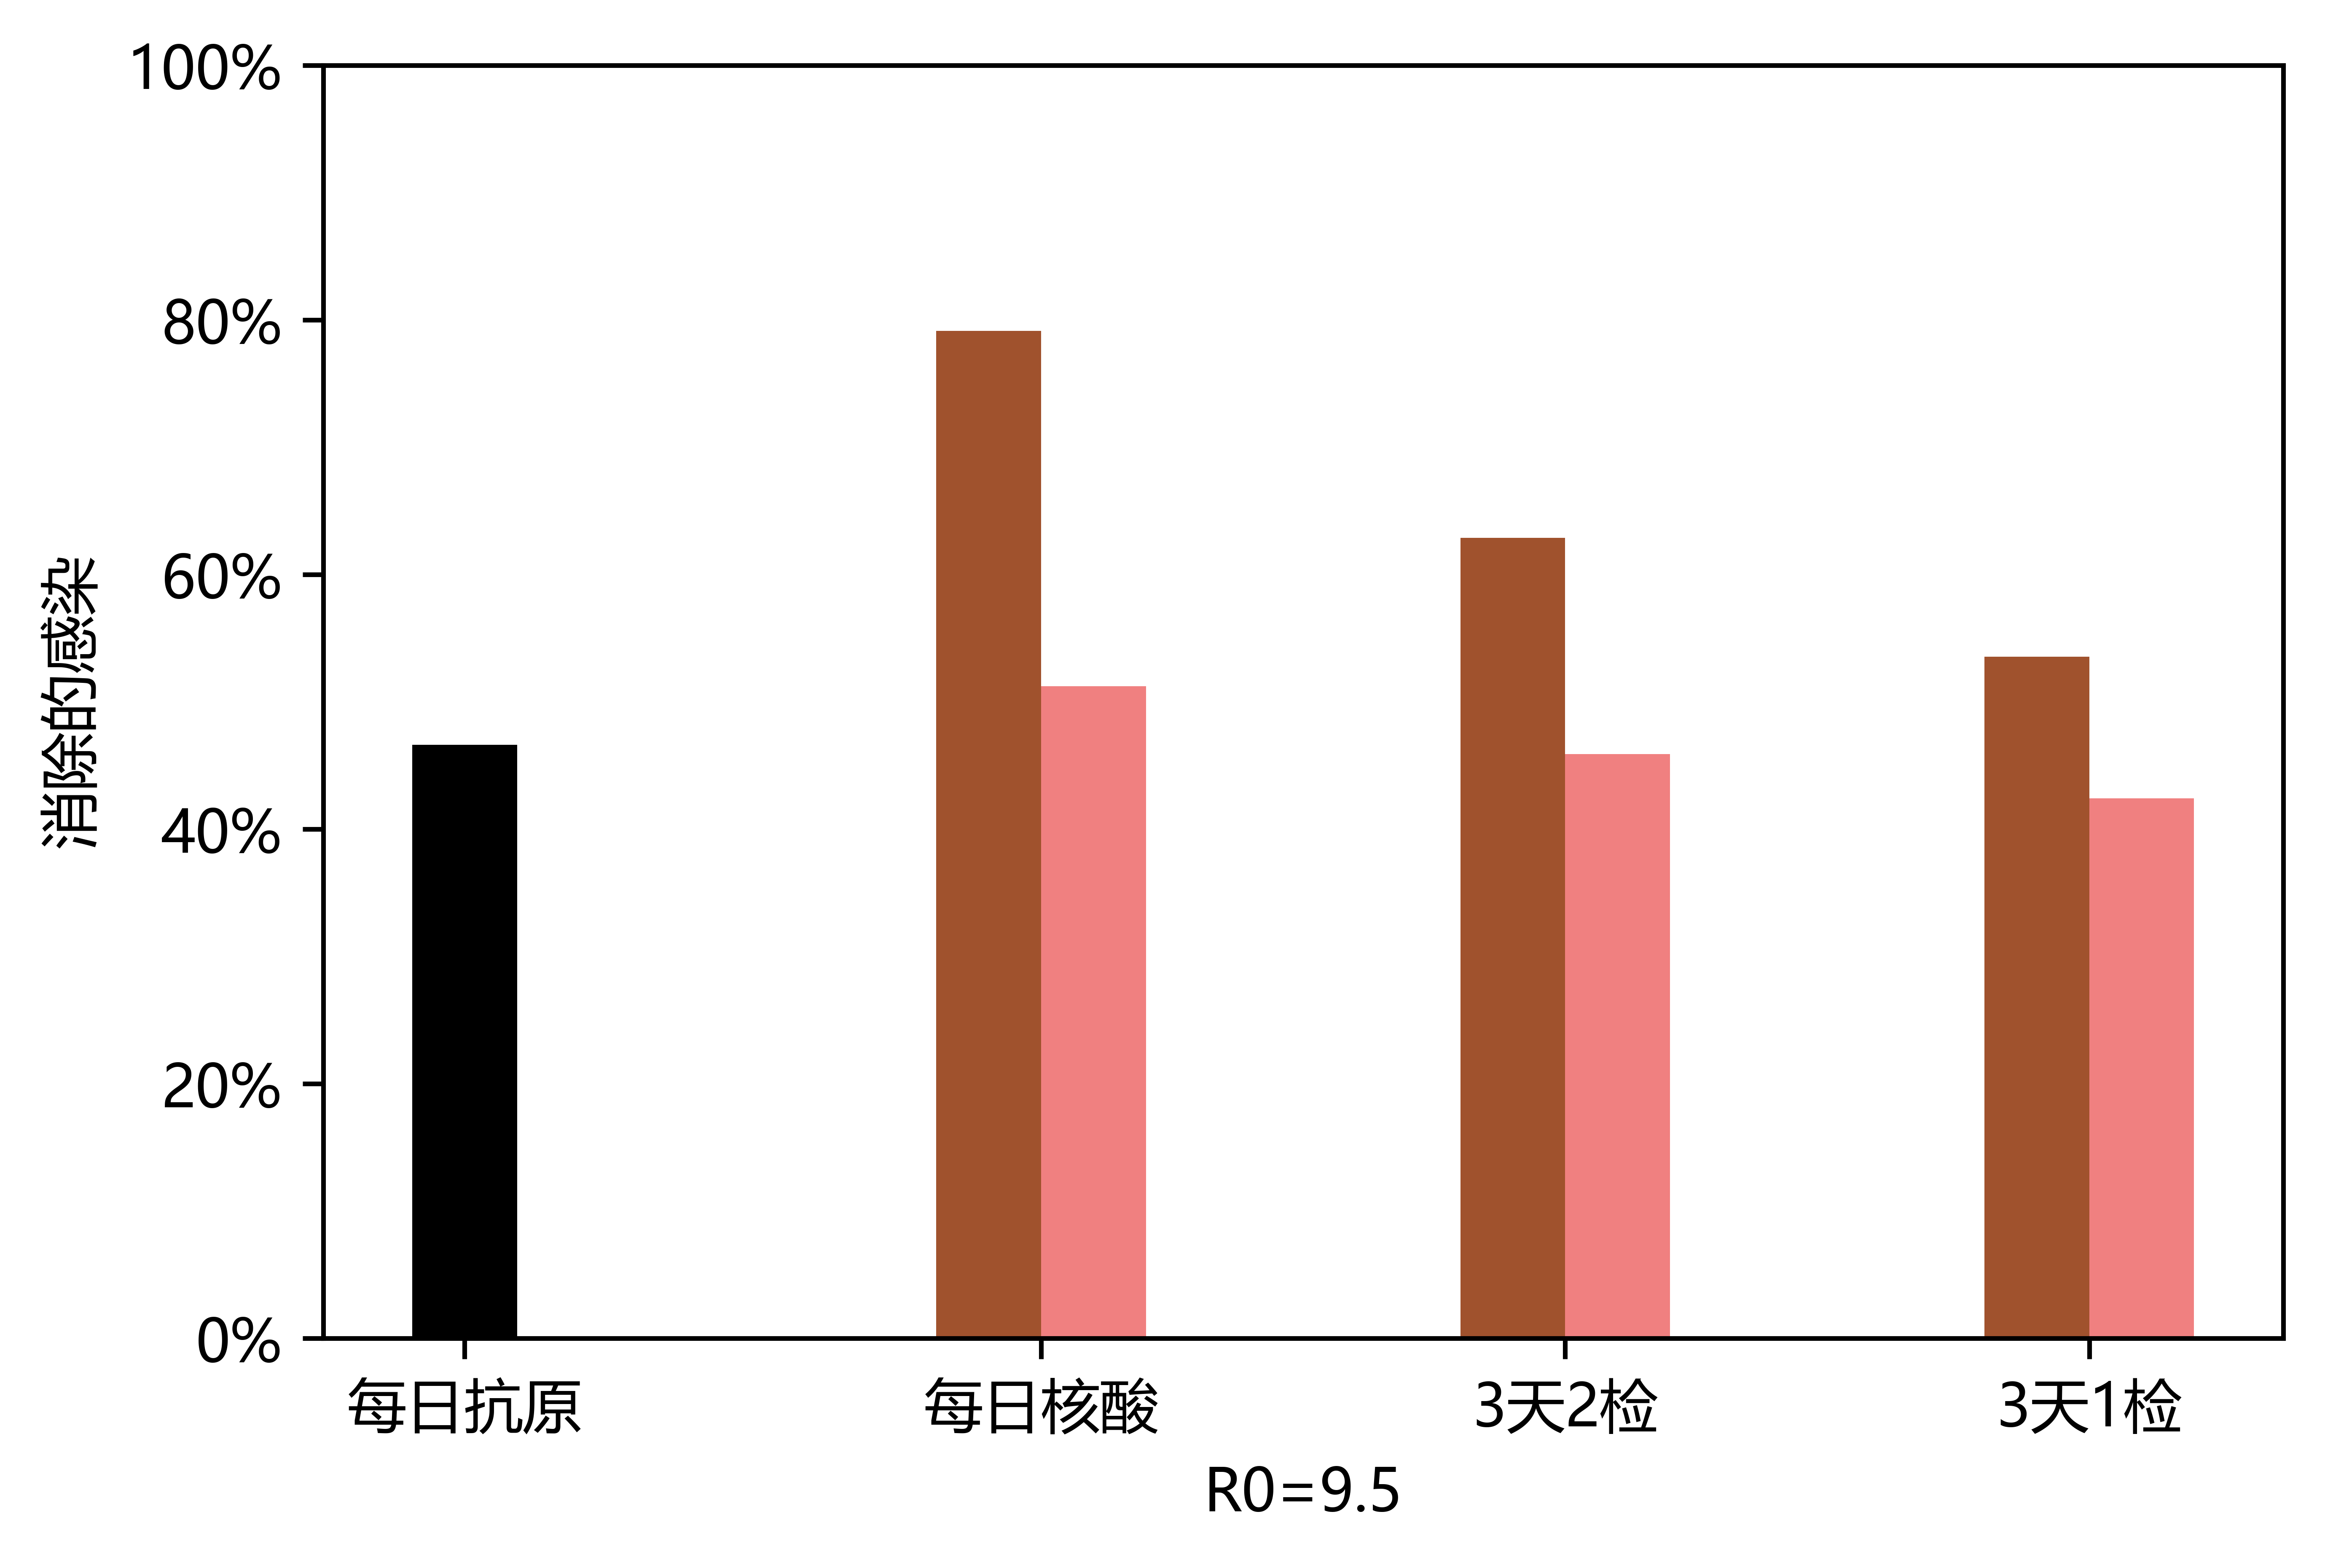

In [24]:
I_alln=[I_all[0],I_all[1],I_all[2]]
I_pron=[I_pro_delay[0],I_pro_delay[1],I_pro_delay[2]]
a=['每日抗原','每日核酸','3天2检','3天1检']
plt.figure(figsize=(6,4),dpi=1000)
bar = np.arange(4)
bar_1=bar[1:]
bar_2 = [i+0.2 for i in bar_1]
bar_3=1/2*(bar_1+bar_2)
bar_3=np.append(0,bar_3)
plt.bar(bar_1, I_alln, width=0.2,color="sienna")
plt.bar(bar_2, I_pron, width=0.2,color="lightcoral")
plt.xticks(bar_3,a,size=10)
plt.bar(0,I_RAT,width=0.2,color='black')
#plt.legend(["核酸检测","核酸延迟1天","抗原检测"],loc='best')
plt.ylabel('消除的感染')
plt.xlabel('R0=9.5')
plt.ylim(0,1)
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
  return '%1.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
#plt.savefig('感染情况.jpg',dpi=1000,bbox_inches = 'tight')